In [1]:
import pandas as pd
from pathlib import Path
# import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pybedtools
from pybedtools import BedTool

warnings.filterwarnings("ignore")

In [2]:
model_organisms = [f for f in Path("pattern_merged_abacaba").glob("*.merged.txt")]
model_organisms

[PosixPath('pattern_merged_abacaba/fr3_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/ce11_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/GCF_000013425.1_ASM1342v1_genomic_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/dm6_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/danRer11_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/galGal6_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/GCF_000008865.2_ASM886v2_genomic_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/sacCer3_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/GCF_000240185.1_ASM24018v2_genomic_abacaba_words_length_50.merged.txt'),
 PosixPath('pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.merged.txt')]

In [3]:
organism_names_all = {
                   'GCF_000002985.6': 'C. elegans',
                   'GCF_000146045.2': 'S. cerevisiae',
                   'GCF_009914755.1': 'H. sapiens',
                   'dm6': 'D. melanogaster',
                   'galGal6': 'G. gallus',
                   'danRer11': 'D. rerio',
                   'GCF_000013425.1': 'S. aureus',
                   'GCF_000240185.1': 'K. pneumoniae',
                   'GCF_000008865.2': 'E. coli'
}

organism_names_all

{'GCF_000002985.6': 'C. elegans',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli'}

In [4]:
from tqdm import tqdm

avoidmers_df = []
nucleotides = {"a", "g", "c", "t"}

for model in tqdm(model_organisms, 
                  leave=True, 
                  position=0):
    
    df = pd.read_csv(model)
    if "chm13v2" in model.name or "fr3" in model.name:
        continue
        
    # df = df[df["sequence"].apply(lambda x: all(c in nucleotides for c in x))]
    if "GC" in model.name:
        organism_name = "_".join(model.name.split("_")[:2])
    else:
        organism_name = model.name.split("_")[0]
        
    df.loc[:, "organism"] = organism_name
    avoidmers_df.append(df)
    
avoidmers_df  = pd.concat(avoidmers_df, axis=0)
avoidmers_df

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.14it/s]


,seqID,start,end,overlapCount,mergedSequence,organism
0,chrI,6208,6259,2,aactcctcgacgacgtcttccatatcaactttcgagaagaatggca...,ce11
1,chrI,8352,8404,3,aatccccgaccaggtagaaaatgagcacaccgattaagtttctcca...,ce11
2,chrI,8562,8613,2,tcagccgtaatcaggtgacctcattaggcctacccaaacacagatt...,ce11
3,chrI,10676,10726,1,gaactgcgaccgaacagagattcgttccgccccatattccggccaa...,ce11
4,chrI,12803,12856,4,aagttgaatcacttgacatctgggaaattagtattccaggcgtaag...,ce11
...,...,...,...,...,...,...
12677,NC_016847.1,1516,1566,1,ttccccttcggaaagttcagcatccttgaagatcttttcaacaata...,GCF_000240185.1
12678,NC_016847.1,1695,1748,4,ttcgaatcactttttcatgtgacgaaacatcttcgtagctgccagg...,GCF_000240185.1
12679,NC_016847.1,2958,3014,3,cctgtttccggcgttcttctcctccgaaaacggtgaacggggacgc...,GCF_000240185.1
12680,NC_016847.1,3038,3112,13,agccggaaaaccggttttcagcacgttcaggaatcgggttcgtcga...,GCF_000240185.1


In [17]:
!pwd

/home/nicol/biolab/avoidmers/notebooks


In [5]:
jellymers = {
                f.name: f for f in Path("avoidmers_expected_vs_observed")\
                                                                                    .glob("*mers") \
                        if "fasta_" in f.name and "python" not in f.name
            }
jellymers

{'sacCer3.fasta_4mers': PosixPath('avoidmers_expected_vs_observed/sacCer3.fasta_4mers'),
 'chm13v2.0.fasta_11mers': PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_11mers'),
 'sacCer3.fasta_5mers': PosixPath('avoidmers_expected_vs_observed/sacCer3.fasta_5mers'),
 'GCF_000240185.1_ASM24018v2_genomic.fasta_13mers': PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_13mers'),
 'sacCer3.fasta_9mers': PosixPath('avoidmers_expected_vs_observed/sacCer3.fasta_9mers'),
 'GCF_000013425.1_ASM1342v1_genomic.fasta_10mers': PosixPath('avoidmers_expected_vs_observed/GCF_000013425.1_ASM1342v1_genomic.fasta_10mers'),
 'sacCer3.fasta_13mers': PosixPath('avoidmers_expected_vs_observed/sacCer3.fasta_13mers'),
 'chm13v2.0.fasta_12mers': PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_12mers'),
 'fr3.fasta_9mers': PosixPath('avoidmers_expected_vs_observed/fr3.fasta_9mers'),
 'galGal6.fasta_6mers': PosixPath('avoidmers_expected_vs_observed/galGal6.fasta_6me

In [6]:
def get_jelly(organism):
    jellymers = {
                int(f.name.split("fasta_")[1].split("mers")[0]): f for f in Path("avoidmers_expected_vs_observed")\
                                                                                    .glob("*mers") \
                        if "fasta_" in f.name and "python" not in f.name and organism in f.name
            }
    return jellymers

jellymers = get_jelly("GCF_00024018")
jellymers

{13: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_13mers'),
 5: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_5mers'),
 3: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_3mers'),
 1: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_1mers'),
 7: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_7mers'),
 11: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_11mers'),
 4: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_4mers'),
 10: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_10mers'),
 2: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_2mers'),
 12: PosixPath('avoidmers_expected_vs_observed/GCF_000240185.1_ASM24018v2_genomic.fasta_12mers'),
 6: PosixPath('avoidmers_expecte

In [7]:
avoidmers_abacaba = pd.read_table("expected_probabilities_14_agct_abacaba.txt", header=None,
                         names=['length', 'total', 'avoidmers', 'expected_probability'])\
                            .set_index("length")["expected_probability"].to_dict()
avoidmers_abacaba

{1: 1.0,
 2: 100.0,
 3: 100.0,
 4: 100.0,
 5: 100.0,
 6: 100.0,
 7: 99.609375,
 8: 98.895263671875,
 9: 97.8607177734375,
 10: 96.5068817138672,
 11: 94.84691619873048,
 12: 92.9011344909668,
 13: 90.6869888305664,
 14: 88.22650015354156}

In [8]:
avoidmers_aba = pd.read_table("expected_probabilities_9_agct_aba.txt", header=None,
                         names=['length', 'total', 'avoidmers', 'expected_probability'])\
                            .set_index("length")["expected_probability"]\
                            .to_dict()
avoidmers_aba

{1: 1.0,
 2: 100.0,
 3: 75.0,
 4: 42.1875,
 5: 16.40625,
 6: 4.1015625,
 7: 0.5859375,
 8: 0.03662109375,
 9: 0.0}

In [9]:
avoidmers = {("aba", int(f.name.split("_")[1])): f for f in Path("avoidmers_theoretical").glob("*aba.txt") if "_aba" in f.name and "_abacaba" not in f.name and "avoidmers" in f.name}
avoidmers = avoidmers | {("abacaba", int(f.name.split("_")[1])): f for f in Path("avoidmers_theoretical").glob("*abacaba.txt") if "_abacaba"in f.name and "avoidmers" in f.name}
avoidmers

{('aba', 2): PosixPath('avoidmers_theoretical/avoidmers_2_agct_aba.txt'),
 ('aba', 4): PosixPath('avoidmers_theoretical/avoidmers_4_agct_aba.txt'),
 ('aba', 10): PosixPath('avoidmers_theoretical/avoidmers_10_agct_aba.txt'),
 ('aba', 3): PosixPath('avoidmers_theoretical/avoidmers_3_agct_aba.txt'),
 ('aba', 8): PosixPath('avoidmers_theoretical/avoidmers_8_agct_aba.txt'),
 ('aba', 6): PosixPath('avoidmers_theoretical/avoidmers_6_agct_aba.txt'),
 ('aba', 7): PosixPath('avoidmers_theoretical/avoidmers_7_agct_aba.txt'),
 ('aba', 9): PosixPath('avoidmers_theoretical/avoidmers_9_agct_aba.txt'),
 ('aba', 5): PosixPath('avoidmers_theoretical/avoidmers_5_agct_aba.txt'),
 ('aba', 1): PosixPath('avoidmers_theoretical/avoidmers_1_agct_aba.txt'),
 ('abacaba',
  3): PosixPath('avoidmers_theoretical/avoidmers_3_agct_abacaba.txt'),
 ('abacaba',
  10): PosixPath('avoidmers_theoretical/avoidmers_10_agct_abacaba.txt'),
 ('abacaba',
  12): PosixPath('avoidmers_theoretical/avoidmers_12_agct_abacaba.txt'),
 (

In [10]:
def read_avoidmers(length, level=3):
    global avoidmers

    if level == 3:
        path = avoidmers["abacaba", length]
        print(f"Loading zimin level {level} (abacaba).")
    elif level == 2:
        path = avoidmers["aba", length]
        print(f"Loading zimin level {level} (aba).")
    else:
        raise ValueError(f"Invalid level {level}. Must be either 2 or 3.")
        
    aavoidmers = set()
    with open(path, mode="r") as f:
        for line in f:
            line = line.strip()
            aavoidmers.add(line)

    return aavoidmers

len(read_avoidmers(10)), 4**10

Loading zimin level 3 (abacaba).


(1011948, 1048576)

In [11]:
jellymers = get_jelly("chm13v2.0")
jellymers

{11: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_11mers'),
 12: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_12mers'),
 1: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_1mers'),
 3: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_3mers'),
 2: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_2mers'),
 4: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_4mers'),
 9: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_9mers'),
 7: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_7mers'),
 6: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_6mers'),
 13: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_13mers'),
 10: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_10mers'),
 8: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_8mers'),
 5: PosixPath('avoidmers_expected_vs_observed/chm13v2.0.fasta_5mers')}

In [12]:
from tqdm import tqdm
from collections import defaultdict 

probabilities = defaultdict(list)
level = 2
for kmer_length in tqdm(range(2, 10), total=12):
    jelly_df = pd.read_csv(
                           jellymers[kmer_length],
                           delimiter=" ",
                           header=None,
                           names=["kmer", "occurrences"]
                          )
    jelly_df.loc[:, "kmer"] = jelly_df["kmer"].str.lower()
    total_occurrences = jelly_df["occurrences"].sum()
    
    theoretical_avoidmers = read_avoidmers(kmer_length, level=level)
    total_theoretical_avoidmers = len(theoretical_avoidmers)
    probability_for_avoidmer = total_theoretical_avoidmers / 4 ** kmer_length
    
    jelly_df = jelly_df[jelly_df["kmer"].isin(theoretical_avoidmers)]
    total_avoidmers = jelly_df["occurrences"].sum()

    probabilities["length"].append(kmer_length)
    probabilities["observed_probability"].append(total_avoidmers / total_occurrences)
    probabilities["probability"].append(probability_for_avoidmer)

probabilities_df_aba = pd.DataFrame(probabilities)
probabilities_df_aba

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 8/12 [00:00<00:00, 39.72it/s]

Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).
Loading zimin level 2 (aba).


,length,observed_probability,probability
0,2,1.000000,1.000000
1,3,0.706518,0.750000
2,4,0.380417,0.421875
3,5,0.143684,0.164062
4,6,0.032955,0.041016
5,7,0.004594,0.005859
6,8,0.000260,0.000366
7,9,0.000000,0.000000


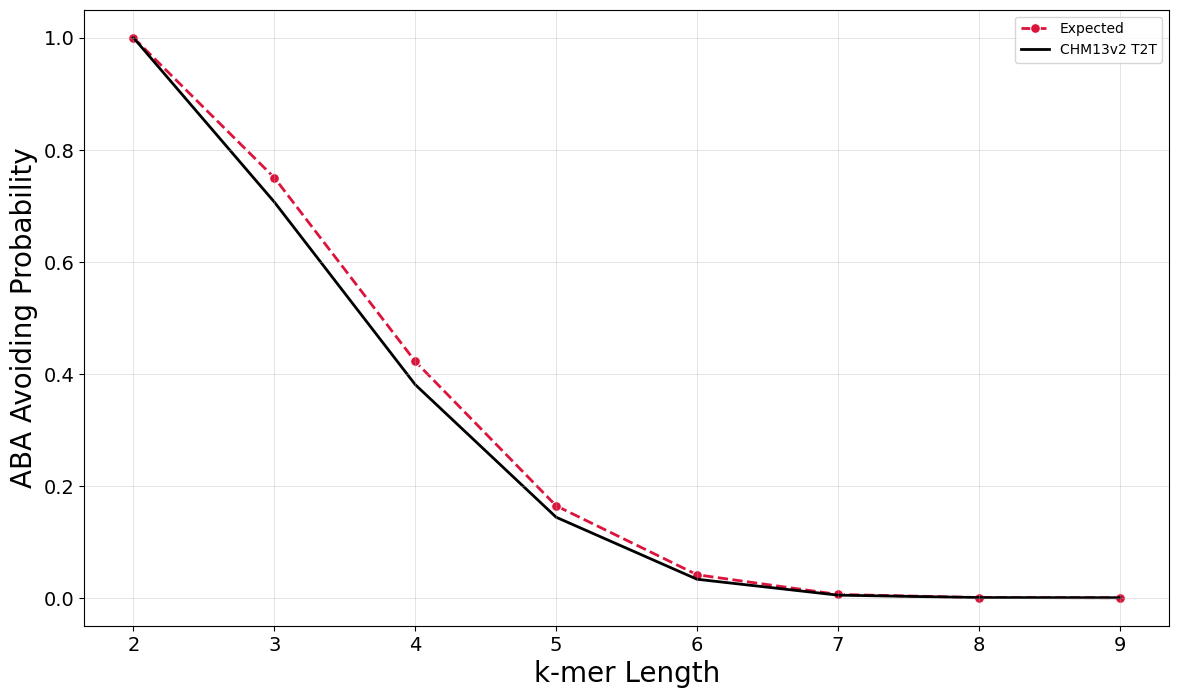

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))

sns.lineplot(data=probabilities_df_aba, x="length", y="probability", lw=2.0, linestyle='--', marker='o', markersize=7, color='crimson', label='Expected', ax=ax, zorder=0)
sns.lineplot(data=probabilities_df_aba, x="length", y="observed_probability", lw=2.0, color='black', label='CHM13v2 T2T', ax=ax, zorder=0)

ax.grid(lw=0.4, alpha=0.6, zorder=3)
ax.set_xlabel("k-mer Length")
ax.xaxis.label.set_size(20)

ax.set_ylabel("ABA Avoiding Probability")
ax.yaxis.label.set_size(20)

ax.tick_params(axis="both", labelsize=14)
ax.set_axisbelow(True)


save_location = Path("zimie")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/aba_avoiding_expected_vs_observed.png", bbox_inches='tight')

# ABACABA Probabilities

In [14]:
organisms = {f.name.split(".fasta")[0]: None for f in Path("avoidmers_expected_vs_observed").glob("*mers") if "python" not in f.name }
organisms = {'_'.join(f.split("_")[:2]): None for f in organisms}
organisms

{'sacCer3': None,
 'chm13v2.0': None,
 'GCF_000240185.1': None,
 'GCF_000013425.1': None,
 'fr3': None,
 'galGal6': None,
 'danRer11': None,
 'fasta_1mers': None,
 'dm6': None,
 'ce11': None,
 'GCF_000008865.2': None}

In [15]:
organisms.pop("fasta_1mers")

In [16]:
get_jelly("GCF_000008865.2")

{11: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_11mers'),
 6: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_6mers'),
 8: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_8mers'),
 12: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_12mers'),
 7: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_7mers'),
 10: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_10mers'),
 3: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_3mers'),
 2: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_2mers'),
 13: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_13mers'),
 4: PosixPath('avoidmers_expected_vs_observed/GCF_000008865.2_ASM886v2_genomic.fasta_4mers'),
 5: PosixPath('avoidmers_expected_vs_observed/GCF_00

In [18]:
from tqdm import tqdm
from collections import defaultdict 

probabilities = defaultdict(list)
level = 3
for organism in organisms:
    jellymers = get_jelly(organism)
    
    for kmer_length in tqdm(range(6, 13), total=12):
        jelly_df = pd.read_csv(
                               jellymers[kmer_length],
                               delimiter=" ",
                               header=None,
                               names=["kmer", "occurrences"]
                              )
        jelly_df.loc[:, "kmer"] = jelly_df["kmer"].str.lower()
        total_occurrences = jelly_df["occurrences"].sum()PosixPath
        
        theoretical_avoidmers = read_avoidmers(kmer_length, level=level)
        total_theoretical_avoidmers = len(theoretical_avoidmers)
        probability_for_avoidmer = total_theoretical_avoidmers / 4 ** kmer_length
        
        jelly_df = jelly_df[jelly_df["kmer"].isin(theoretical_avoidmers)]
        total_avoidmers = jelly_df["occurrences"].sum()

        probabilities["organism"].append(organism)
        probabilities["length"].append(kmer_length)
        probabilities["observed_probability"].append(total_avoidmers / total_occurrences)
        probabilities["probability"].append(probability_for_avoidmer)

probabilities_df_abacaba = pd.DataFrame(probabilities)
probabilities_df_abacaba

 25%|█████████████████████████████████████                                                                                                               | 3/12 [00:00<00:00, 22.23it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:07<00:09,  1.55s/it]

Loading zimin level 3 (abacaba).


 25%|█████████████████████████████████████                                                                                                               | 3/12 [00:00<00:02,  3.85it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 33%|█████████████████████████████████████████████████▎                                                                                                  | 4/12 [00:01<00:01,  4.21it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [00:02<00:03,  1.80it/s]

Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:08<00:13,  2.21s/it]

Loading zimin level 3 (abacaba).


  8%|████████████▎                                                                                                                                       | 1/12 [00:00<00:09,  1.20it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 33%|█████████████████████████████████████████████████▎                                                                                                  | 4/12 [00:01<00:01,  4.30it/s]

Loading zimin level 3 (abacaba).


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [00:02<00:03,  2.07it/s]

Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:06<00:10,  1.68s/it]

Loading zimin level 3 (abacaba).


  8%|████████████▎                                                                                                                                       | 1/12 [00:00<00:08,  1.23it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 33%|█████████████████████████████████████████████████▎                                                                                                  | 4/12 [00:01<00:01,  4.36it/s]

Loading zimin level 3 (abacaba).


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [00:02<00:03,  2.29it/s]

Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:05<00:07,  1.31s/it]

Loading zimin level 3 (abacaba).


  0%|                                                                                                                                                            | 0/12 [00:00<?, ?it/s]

Loading zimin level 3 (abacaba).


  8%|████████████▎                                                                                                                                       | 1/12 [00:00<00:07,  1.49it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 33%|█████████████████████████████████████████████████▎                                                                                                  | 4/12 [00:00<00:01,  4.97it/s]

Loading zimin level 3 (abacaba).


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [00:02<00:03,  2.20it/s]

Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:07<00:11,  1.90s/it]

Loading zimin level 3 (abacaba).


  8%|████████████▎                                                                                                                                       | 1/12 [00:01<00:20,  1.89s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 33%|█████████████████████████████████████████████████▎                                                                                                  | 4/12 [00:02<00:03,  2.19it/s]

Loading zimin level 3 (abacaba).


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [00:03<00:04,  1.55it/s]

Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:09<00:13,  2.22s/it]

Loading zimin level 3 (abacaba).


  0%|                                                                                                                                                            | 0/12 [00:00<?, ?it/s]

Loading zimin level 3 (abacaba).


  8%|████████████▎                                                                                                                                       | 1/12 [00:00<00:09,  1.17it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 33%|█████████████████████████████████████████████████▎                                                                                                  | 4/12 [00:01<00:02,  3.92it/s]

Loading zimin level 3 (abacaba).


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [00:02<00:04,  1.69it/s]

Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:08<00:12,  2.16s/it]

Loading zimin level 3 (abacaba).


  0%|                                                                                                                                                            | 0/12 [00:00<?, ?it/s]

Loading zimin level 3 (abacaba).


  8%|████████████▎                                                                                                                                       | 1/12 [00:00<00:08,  1.22it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 33%|█████████████████████████████████████████████████▎                                                                                                  | 4/12 [00:01<00:01,  4.30it/s]

Loading zimin level 3 (abacaba).


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [00:02<00:03,  1.82it/s]

Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:07<00:11,  1.94s/it]

Loading zimin level 3 (abacaba).


  0%|                                                                                                                                                            | 0/12 [00:00<?, ?it/s]

Loading zimin level 3 (abacaba).


  8%|████████████▎                                                                                                                                       | 1/12 [00:01<00:11,  1.01s/it]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 33%|█████████████████████████████████████████████████▎                                                                                                  | 4/12 [00:01<00:02,  3.52it/s]

Loading zimin level 3 (abacaba).


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [00:02<00:04,  1.59it/s]

Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:09<00:14,  2.46s/it]

Loading zimin level 3 (abacaba).


 25%|█████████████████████████████████████                                                                                                               | 3/12 [00:01<00:02,  3.36it/s]

Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).
Loading zimin level 3 (abacaba).


 42%|█████████████████████████████████████████████████████████████▋                                                                                      | 5/12 [00:02<00:04,  1.66it/s]

Loading zimin level 3 (abacaba).


 50%|██████████████████████████████████████████████████████████████████████████                                                                          | 6/12 [00:07<00:10,  1.76s/it]

Loading zimin level 3 (abacaba).


 58%|██████████████████████████████████████████████████████████████████████████████████████▎                                                             | 7/12 [00:24<00:17,  3.54s/it]


,organism,length,observed_probability,probability
0,sacCer3,6,1.000000,1.000000
1,sacCer3,7,0.990533,0.996094
2,sacCer3,8,0.978299,0.988953
3,sacCer3,9,0.960781,0.978607
4,sacCer3,10,0.938173,0.965069
...,...,...,...,...
65,GCF_000008865.2,8,0.988635,0.988953
66,GCF_000008865.2,9,0.976943,0.978607
67,GCF_000008865.2,10,0.961337,0.965069
68,GCF_000008865.2,11,0.942871,0.948469


In [19]:
organism_names_all = {
                         'ce11': 'C. elegans',
                         'GCF_000146045.2': 'S. cerevisiae',
                         'GCF_009914755.1': 'H. sapiens',
                         'dm6': 'D. melanogaster',
                         'galGal6': 'G. gallus',
                         'danRer11': 'D. rerio',
                         'GCF_000013425.1': 'S. aureus',
                         'GCF_000240185.1': 'K. pneumoniae',
                         'GCF_000008865.2': 'E. coli',
                         'ce11': 'C. elegans',
                         'sacCer3': 'S. cerevisiae',
                         'chm13v2.0': 'H. sapiens'
                     }
organism_names_all

{'ce11': 'C. elegans',
 'GCF_000146045.2': 'S. cerevisiae',
 'GCF_009914755.1': 'H. sapiens',
 'dm6': 'D. melanogaster',
 'galGal6': 'G. gallus',
 'danRer11': 'D. rerio',
 'GCF_000013425.1': 'S. aureus',
 'GCF_000240185.1': 'K. pneumoniae',
 'GCF_000008865.2': 'E. coli',
 'sacCer3': 'S. cerevisiae',
 'chm13v2.0': 'H. sapiens'}

In [20]:
probabilities_df_abacaba.loc[:, "organism_name"] = probabilities_df_abacaba["organism"].map(organism_names_all)
probabilities_df_abacaba

,organism,length,observed_probability,probability,organism_name
0,sacCer3,6,1.000000,1.000000,S. cerevisiae
1,sacCer3,7,0.990533,0.996094,S. cerevisiae
2,sacCer3,8,0.978299,0.988953,S. cerevisiae
3,sacCer3,9,0.960781,0.978607,S. cerevisiae
4,sacCer3,10,0.938173,0.965069,S. cerevisiae
...,...,...,...,...,...
65,GCF_000008865.2,8,0.988635,0.988953,E. coli
66,GCF_000008865.2,9,0.976943,0.978607,E. coli
67,GCF_000008865.2,10,0.961337,0.965069,E. coli
68,GCF_000008865.2,11,0.942871,0.948469,E. coli


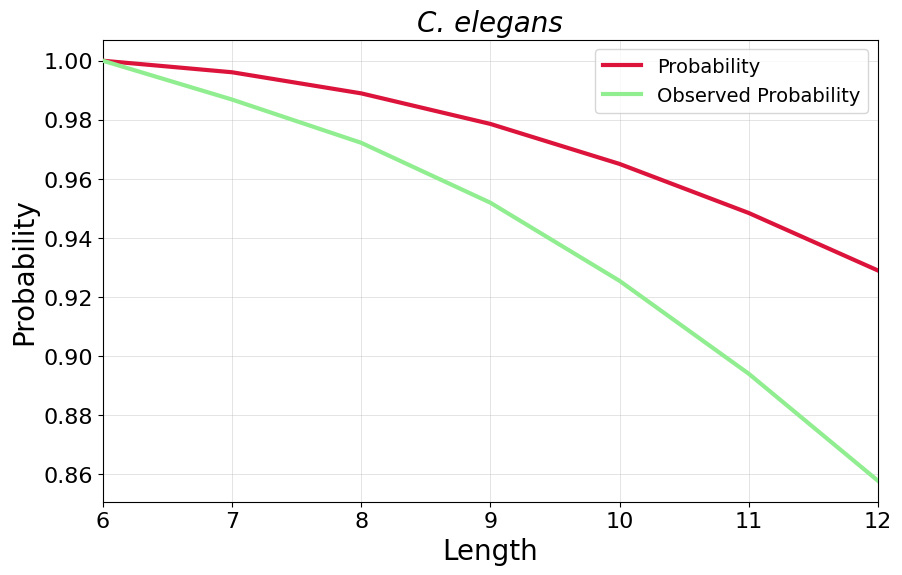

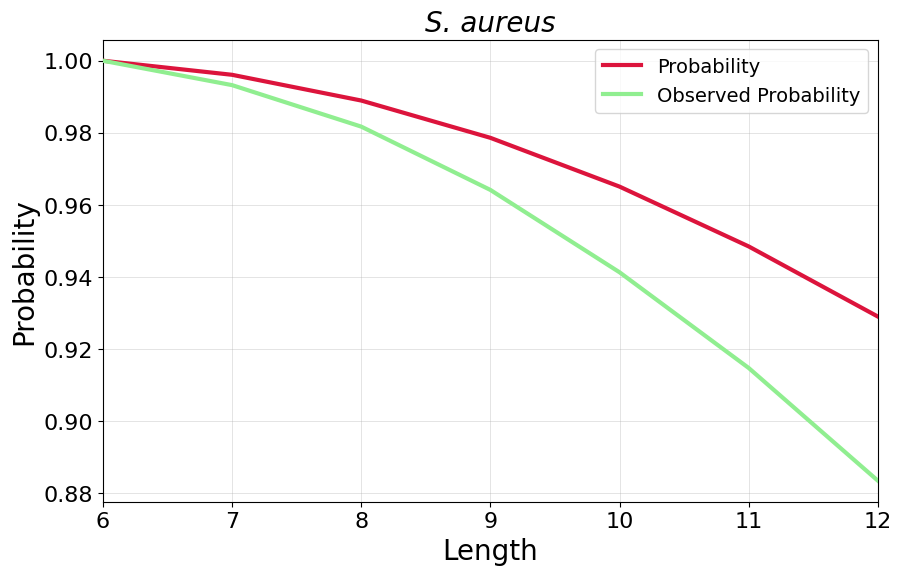

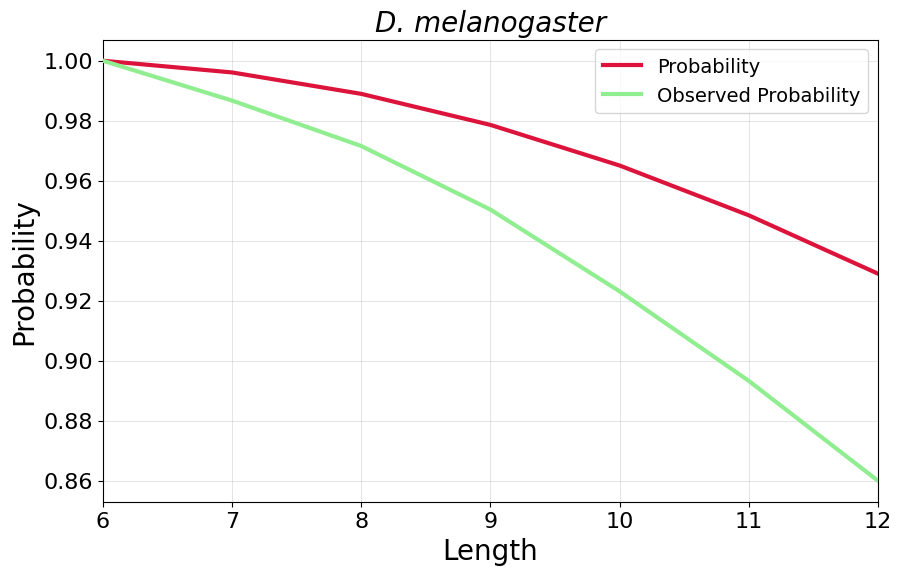

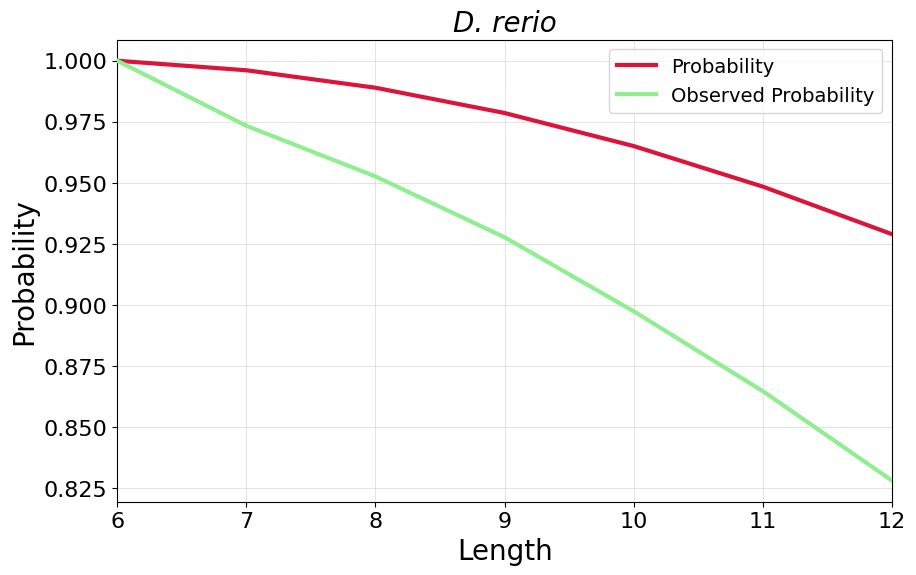

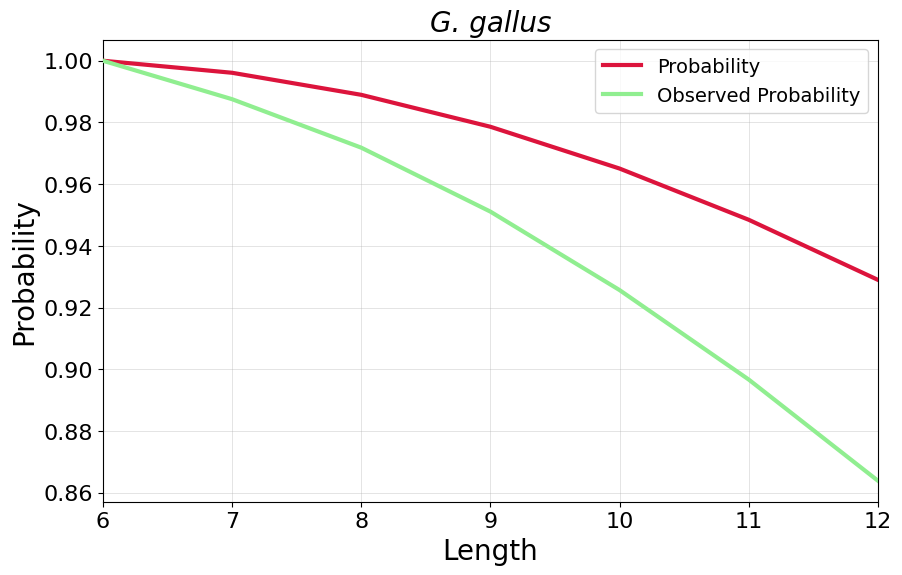

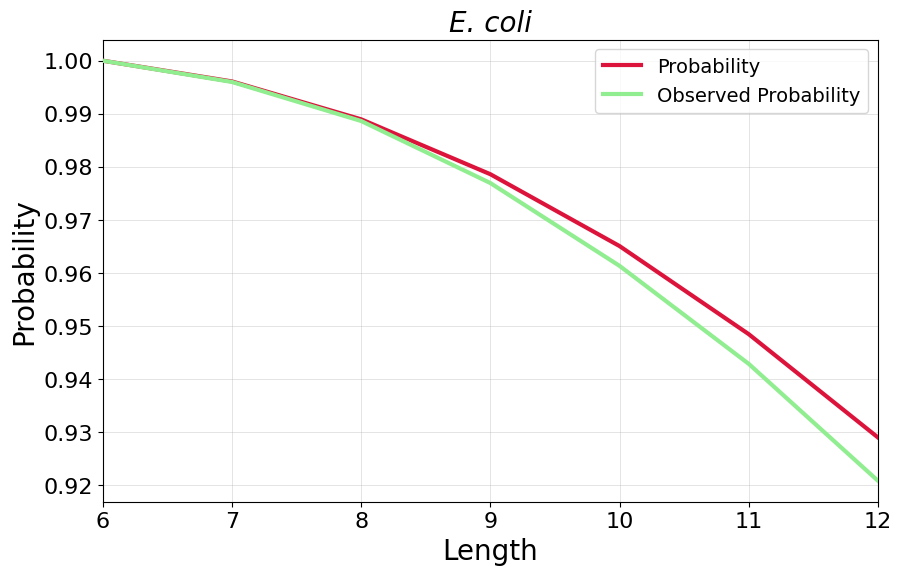

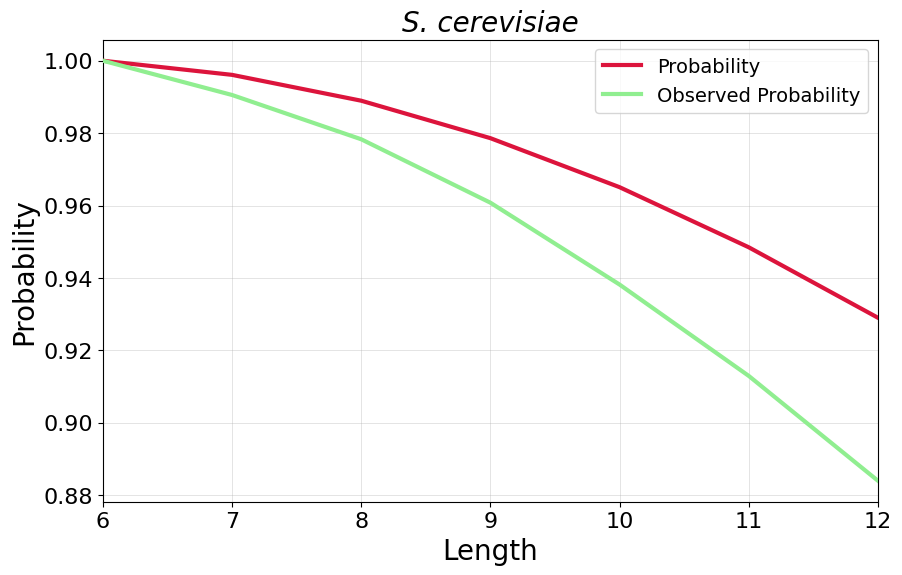

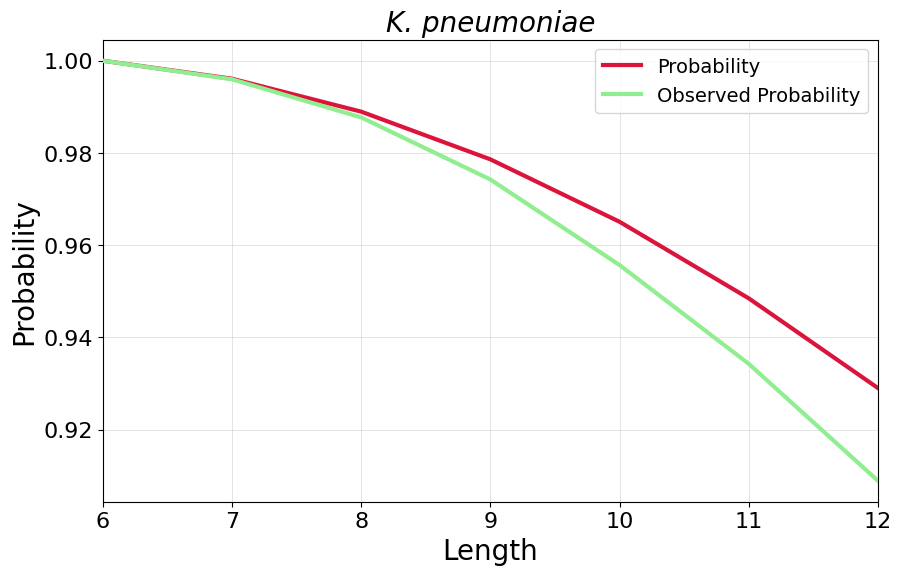

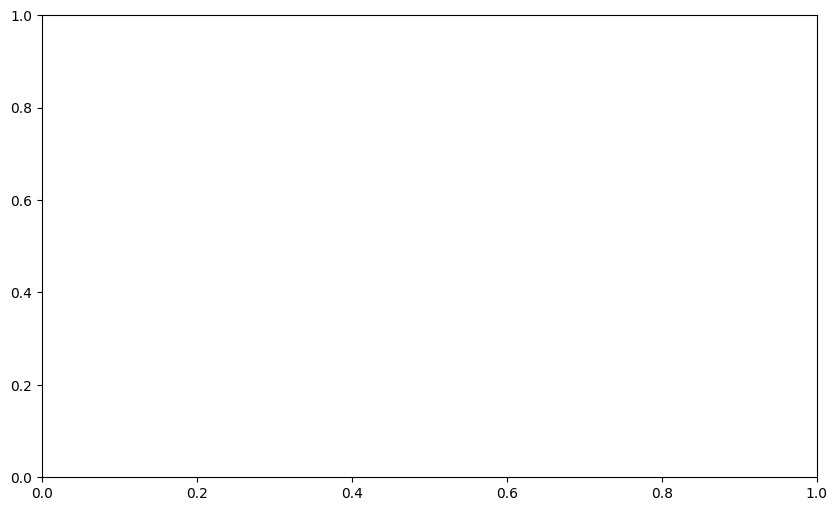

In [21]:

for organism in model_organisms:

    if "fr3" in organism.name:
        continue
        
    fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    name = organism.name
    if "GC" in name:
        name = "_".join(name.split("_")[:2])
    else:
        name = name.split("_")[0]

    if "chm13v2" in name:
        continue

    
    organism_ = organism_names_all[name]
    temp = probabilities_df_abacaba[probabilities_df_abacaba['organism'] == name].melt(id_vars=['organism', 'length'], value_vars=['probability', 'observed_probability'])
    temp["variable"] = temp["variable"].replace("observed_probability", "Observed Probability").replace("probability", "Probability")
    sns.lineplot(data=temp, 
                 x="length",
                 y="value",
                 hue="variable",
                 palette={"Probability": "crimson",
                          "Observed Probability": "lightgreen",
                         },
                 lw=3.0,
                 ax=ax,
            zorder=3
    )
    ax.set_title(organism_names_all[name], style='italic')
    ax.title.set_size(20)

    ax.grid(lw=0.4, alpha=0.6)
    ax.set_xlim(xmin=6, xmax=12)
    ax.legend(title="", prop={"size": 14})
    ax.set_xlabel("Length")
    ax.set_ylabel("Probability")
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis="both", labelsize=16)

    save_location = Path("zimie/probabilities")
    save_location.mkdir(exist_ok=True)
    plt.gcf().savefig(f"{save_location}/expected_vs_observed_{name}_avoidmers_probability_up_to_12mers.png", bbox_inches='tight')
    plt.show()
    plt.close()
    